# Check interpolation (python 2 vs 3)

In [1]:
# Set up the path to SModelS installation folder
import sys
sys.path.append("../")

In [2]:
from smodels.base.physicsUnits import GeV
from smodels.experiment.databaseObj import Database
from smodels.base.smodelsLogging import setLogLevel
from imp import reload
from matplotlib import pyplot as plt
import numpy as np
setLogLevel("info")

/tmp/ipykernel_112396/1545821889.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


### Mass point to be checked:

In [3]:
mass = [[9.92E+02*GeV, 1.29E+02*GeV], [9.91E+02*GeV, 1.29E+02*GeV]]

### Load the Database of experimental result

In [4]:
# Set the path to the database
databaseA = Database("./database")
databaseA.selectExpResults(analysisIDs='CMS-SUS-13-012',datasetIDs='6NJet8_500HT800_450MHTinf',txnames='T2')
expA = databaseA.expResultList[0]
tx = expA.getTxNames()[0]
txA = tx.txnameData
resA = tx.getEfficiencyFor(sms=None,mass=mass)
point = [m.asNumber(GeV) for m in np.array(mass).flatten()]
print(point)
print('interpolation result = ',resA)

INFO in databaseObj.loadDatabase() in 434: Creating binary database 
INFO in databaseObj.loadDatabase() in 435: (this may take a few minutes, but it's done only once!)
INFO in databaseObj.loadTextDatabase() in 449: Parsing text database at /home/lessa/smodels-graphs/unittests/database/
INFO in databaseObj.createBinaryFile() in 600: /home/lessa/smodels-graphs/unittests/database/db3.pcl created.
INFO in metaObj.printFastlimBanner() in 162: FastLim v1.1 efficiencies loaded. Please cite: arXiv:1402.0492, EPJC74 (2014) 11


[992.0, 129.0, 991.0, 129.0]
interpolation result =  9.126429718588151e-05


### Plot triangulation

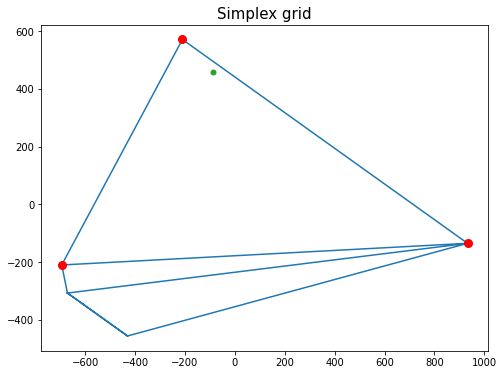

In [5]:
#Plot simplex grid:
plt.figure(figsize=(8,6))
plt.triplot(txA.tri.points[:,0], txA.tri.points[:,1], txA.tri.simplices.copy())
pointA = txA.PCAtransf(point)


#Get simplex containing the point:
simplexA = txA.tri.find_simplex(pointA[:2], tol=1e-6)
#Get the list of vertices fro the simplex:
verticesA = txA.tri.simplices[simplexA]
#Get the points corresponding to the vertices:
simplexPointsA = np.array([txA.tri.points[iv] for iv in verticesA])

plt.plot(pointA[0],pointA[1],'o',markersize=5)
plt.plot(simplexPointsA[:,0],simplexPointsA[:,1],'o',markersize=8,color='red')
plt.title("Simplex grid", fontsize=15)
plt.show()